In [1]:
import os
import re
import glob
import datetime
import time
import numpy as np
import GPX_functions
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
# from mpl_toolkits.basemap import Basemap
plt.style.use('dark_background')
import cartopy
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()  

In [2]:
figdir = "../images"
dd = datetime.date.fromtimestamp(time.time())
fname = "confinement_run_{}".format(dd.strftime("%y%m%d"))

In [3]:
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

In [4]:
datafilelist = sorted(glob.glob(os.path.join("/data/GPX/GranCanaria/2020/Confinement/", "*.gpx")))

In [5]:
lon_all, lat_all, ele_all = np.array([]), np.array([]), np.array([])
for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    lon_all = np.append(lon_all, lon)
    lat_all = np.append(lat_all, lat)
    ele_all = np.append(ele_all, ele)

In [6]:
lonmin = lon_all.min()
lonmax = lon_all.max()
latmin = lat_all.min()
latmax = lat_all.max()

lonscale = lonmin + 0.8 * (lonmax - lonmin)
latscale = latmin + 0.75 * (latmax - latmin)

In [40]:
#m = Basemap(projection='merc',llcrnrlat=latmin, urcrnrlat=latmax,
#            llcrnrlon=lonmin, urcrnrlon=lonmax, lat_ts=28., 
#            resolution='c')

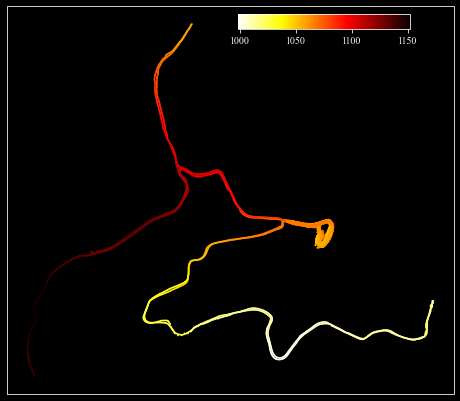

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)

#ax.set_xlim(-15.5725, -15.5705)
#ax.set_ylim(28.038, 28.039)
scat = ax.scatter(lon_all, lat_all, s=.5, c=ele_all,
                 vmin=ele_all.min(), vmax=ele_all.max(), cmap=plt.cm.hot_r)

fig_coord = [0.525, .8, 0.30, 0.025]
cbar_ax = fig.add_axes(fig_coord)
cb = plt.colorbar(scat, cax=cbar_ax, orientation="horizontal")

ax.set_xticks([])
ax.set_yticks([])
#plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.show()
plt.close()